#### **Environment & Imports**

In [1]:
import sys
import platform
import os
import warnings
import re

import numpy as np
import pandas as pd

from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Silence warnings for clean output--
warnings.filterwarnings("ignore")

# Use local nltk_data directory
NLTK_DIR = os.path.join(os.getcwd(), "nltk_data")
os.makedirs(NLTK_DIR, exist_ok=True)
nltk.data.path.append(NLTK_DIR)

# Download required resources silently
for resource in ["punkt", "stopwords", "wordnet"]:
    nltk.download(resource, download_dir=NLTK_DIR, quiet=True)

# Machine Learning Imports
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# Visualization & Reproducibility Settings
sns.set(style="whitegrid", context="notebook")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Environment initialized successfully.")

Environment initialized successfully.


In [2]:
BASE_DATA_DIR = Path("data")

#### **Data Loading**

-- COURSES & REVIEWS — COURSERA

Load Coursera Reviews Dataset

In [3]:
coursera_reviews = pd.read_csv(BASE_DATA_DIR / "coursera_reviews_dataset.csv")
print("Coursera dataset loaded.")

Coursera dataset loaded.


Coursera Shape & Columns

In [4]:
print("Coursera Shape:", coursera_reviews.shape)
print("Coursera Columns:")
print(coursera_reviews.columns)

Coursera Shape: (12000, 4)
Coursera Columns:
Index(['review', 'rating', 'course', 'instructor'], dtype='object')


Preview Coursera Reviews

In [5]:
coursera_reviews.head()

,review,rating,course,instructor
0,The instructor was very clear and engaging.,5,Envisioneer world-class metrics,Laura Frazier
1,Not enough examples or practice problems.,1,Innovate impactful eyeballs,Heather Duran PhD
2,"Average content, nothing special.",3,Maximize customized web services,James Massey
3,The instructor was very clear and engaging.,4,Utilize synergistic deliverables,Jeanette Chung
4,Not enough examples or practice problems.,1,Orchestrate b2c schemas,David Lewis


Coursera Missing Value Check

In [6]:
coursera_reviews.isnull().sum()

review        0
rating        0
course        0
instructor    0
dtype: int64

Coursera Rating Distribution

In [7]:
coursera_reviews["rating"].value_counts().sort_index()

rating
1    1201
2    1187
3    2348
4    3688
5    3576
Name: count, dtype: int64

-- COURSES & REVIEWS — UDEMY

Load Udemy Reviews Dataset

In [8]:
udemy_reviews = pd.read_csv(BASE_DATA_DIR / "udemy_reviews_dataset.csv")
print("Udemy dataset loaded.")

Udemy dataset loaded.


Udemy Shape & Columns

In [9]:
print("Udemy Shape:", udemy_reviews.shape)
print("Udemy Columns:")
print(udemy_reviews.columns)

Udemy Shape: (15000, 4)
Udemy Columns:
Index(['review', 'rating', 'course', 'instructor'], dtype='object')


Preview Udemy Reviews

In [10]:
udemy_reviews.head()

,review,rating,course,instructor
0,"Neither good nor bad, just decent.",3,Transform visionary niches,Ricky Hernandez
1,The course was too difficult to follow.,1,Evolve cross-media infrastructures,Steven Ross
2,Great content and well-paced delivery.,4,Benchmark synergistic interfaces,Natalie Decker
3,Material was outdated and not relevant.,1,Monetize dot-com supply-chains,Stephen Benitez
4,Highly recommended for beginners.,4,Exploit world-class niches,James Brown


Udemy Missing Value Check

In [11]:
udemy_reviews.isnull().sum()

review        0
rating        0
course        0
instructor    0
dtype: int64

Udemy Rating Distribution

In [12]:
udemy_reviews["rating"].value_counts().sort_index()

rating
1    1424
2    1467
3    2966
4    4607
5    4536
Name: count, dtype: int64

-- MOBILE APPS — GOOGLE PLAY STORE

Load Google Play Reviews Dataset

In [13]:
google_reviews = pd.read_csv(BASE_DATA_DIR / "googleplaystore_user_reviews_dataset.csv")
print("Google Play dataset loaded.")

Google Play dataset loaded.


Google Play Shape & Columns

In [14]:
print("Google Play Shape:", google_reviews.shape)
print("Google Play Columns:")
print(google_reviews.columns)

Google Play Shape: (64295, 5)
Google Play Columns:
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


Preview Google Play Reviews

In [15]:
google_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Google Play Missing Value Check

In [16]:
google_reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

Google Play Sentiment Distribution

In [17]:
google_reviews["Sentiment"].value_counts()

Sentiment
Positive    23998
Negative     8271
Neutral      5163
Name: count, dtype: int64

-- INSTRUCTOR REVIEWS — RATEMYPROFESSORS

Load RateMyProfessors Reviews Dataset

In [18]:
rmp_reviews = pd.read_csv(BASE_DATA_DIR / "ratemyprofessors_dataset.csv")
print("RateMyProfessors dataset loaded.")

RateMyProfessors dataset loaded.


RMP Shape & Columns

In [19]:
print("RMP Shape:", rmp_reviews.shape)
print("RMP Columns:")
print(rmp_reviews.columns)

RMP Shape: (10000, 4)
RMP Columns:
Index(['review', 'rating', 'course', 'instructor'], dtype='object')


Preview RMP Reviews

In [20]:
rmp_reviews.head()

,review,rating,course,instructor
0,The course was okay but could be better.,3,Scale killer action-items,John Ellis
1,The course was okay but could be better.,3,Iterate frictionless schemas,David Carroll
2,Fantastic course with useful material.,5,Re-intermediate cutting-edge info-mediaries,Amy Lee
3,The instructor was very clear and engaging.,5,Innovate best-of-breed experiences,Carrie Drake
4,It's fine for a quick overview.,3,Grow bleeding-edge e-services,Anna Cunningham


RMP Missing Value Check

In [21]:
rmp_reviews.isnull().sum()

review        0
rating        0
course        0
instructor    0
dtype: int64

RMP Rating Distribution

In [22]:
rmp_reviews["rating"].value_counts().sort_index()

rating
1    1022
2    1005
3    1946
4    3023
5    3004
Name: count, dtype: int64

#### **Data Validation & Schema Checks**

Validate Coursera Column Presence

In [23]:
expected_coursera_cols = {"review", "rating", "course", "instructor"}
print("Coursera columns valid:",
      expected_coursera_cols.issubset(coursera_reviews.columns))

Coursera columns valid: True


Validate Udemy Column Presence

In [24]:
expected_udemy_cols = {"review", "rating", "course", "instructor"}
print("Udemy columns valid:",
      expected_udemy_cols.issubset(udemy_reviews.columns))

Udemy columns valid: True


Validate Google Play Column Presence

In [25]:
expected_google_cols = {
    "Translated_Review", "Sentiment",
    "Sentiment_Polarity", "Sentiment_Subjectivity"
}

print("Google Play columns valid:",
      expected_google_cols.issubset(google_reviews.columns))

Google Play columns valid: True


Validate RateMyProfessors Column Presence

In [26]:
expected_rmp_cols = {"review", "rating", "course", "instructor"}
print("RMP columns valid:",
      expected_rmp_cols.issubset(rmp_reviews.columns))

RMP columns valid: True


Data Type Inspection

In [27]:
print("Coursera dtypes:\n", coursera_reviews.dtypes, "\n")
print("Udemy dtypes:\n", udemy_reviews.dtypes, "\n")
print("Google Play dtypes:\n", google_reviews.dtypes, "\n")
print("RMP dtypes:\n", rmp_reviews.dtypes)

Coursera dtypes:
 review        object
rating         int64
course        object
instructor    object
dtype: object 

Udemy dtypes:
 review        object
rating         int64
course        object
instructor    object
dtype: object 

Google Play dtypes:
 App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object 

RMP dtypes:
 review        object
rating         int64
course        object
instructor    object
dtype: object


Enforce Rating Data Types

In [28]:
coursera_reviews["rating"] = coursera_reviews["rating"].astype(int)
udemy_reviews["rating"] = udemy_reviews["rating"].astype(int)
rmp_reviews["rating"] = rmp_reviews["rating"].astype(int)

print("Rating columns enforced as integers.")

Rating columns enforced as integers.


Rating Boundary Check

In [29]:
def check_rating_bounds(df, name):
    invalid = df[~df["rating"].between(1, 5)]
    print(f"{name} invalid ratings:", invalid.shape[0])

check_rating_bounds(coursera_reviews, "Coursera")
check_rating_bounds(udemy_reviews, "Udemy")
check_rating_bounds(rmp_reviews, "RMP")

Coursera invalid ratings: 0
Udemy invalid ratings: 0
RMP invalid ratings: 0


Remove Invalid Ratings

In [30]:
coursera_reviews = coursera_reviews[coursera_reviews["rating"].between(1, 5)]
udemy_reviews = udemy_reviews[udemy_reviews["rating"].between(1, 5)]
rmp_reviews = rmp_reviews[rmp_reviews["rating"].between(1, 5)]

print("Invalid ratings removed.")

Invalid ratings removed.


Empty Review Text Detection

In [31]:
print("Coursera empty reviews:",
      coursera_reviews["review"].isna().sum())

print("Udemy empty reviews:",
      udemy_reviews["review"].isna().sum())

print("Google Play empty reviews:",
      google_reviews["Translated_Review"].isna().sum())

print("RMP empty reviews:",
      rmp_reviews["review"].isna().sum())

Coursera empty reviews: 0
Udemy empty reviews: 0
Google Play empty reviews: 26868
RMP empty reviews: 0


Remove Empty Google Play Reviews

In [32]:
google_reviews = google_reviews.dropna(subset=["Translated_Review"])
print("Google Play shape after dropping empty reviews:",
      google_reviews.shape)

Google Play shape after dropping empty reviews: (37427, 5)


Text Length Sanity Check

In [33]:
coursera_reviews["review_length_raw"] = coursera_reviews["review"].str.len()
udemy_reviews["review_length_raw"] = udemy_reviews["review"].str.len()
rmp_reviews["review_length_raw"] = rmp_reviews["review"].str.len()
google_reviews["review_length_raw"] = google_reviews["Translated_Review"].str.len()

coursera_reviews["review_length_raw"].describe()

count    12000.000000
mean        39.037833
std          6.596049
min         24.000000
25%         34.000000
50%         38.000000
75%         43.000000
max         52.000000
Name: review_length_raw, dtype: float64

Identify Extremely Short Reviews

In [34]:
short_reviews = coursera_reviews[coursera_reviews["review_length_raw"] < 5]
print("Extremely short Coursera reviews:", short_reviews.shape)

Extremely short Coursera reviews: (0, 5)


Identify Extremely Long Reviews

In [35]:
long_reviews = coursera_reviews[coursera_reviews["review_length_raw"] > 2000]
print("Extremely long Coursera reviews:", long_reviews.shape)

Extremely long Coursera reviews: (0, 5)


Data Validation Summary

- All datasets passed schema and data type checks  
- Invalid ratings were identified and removed  
- Empty reviews were detected and handled explicitly  
- Text length extremes were inspected but not deleted  

No destructive cleaning was applied at this stage to preserve
real-world language variability.

#### **Sentiment Labeling**

-- **Why Ratings Are Not the Same as Text Sentiment**

A numeric rating represents an overall evaluation, while review text
contains subjective, ambiguous, and context-dependent language.

Examples:
- A 5-star rating may include criticism
- A 3-star rating may include both praise and complaints
- Short reviews may omit emotional language entirely

Therefore, ratings are used only as a *proxy label* for supervised learning,
not as a replacement for textual sentiment.

-- **Sentiment Leakage Consideration**

Sentiment labels are derived from ratings, not from review text.
This ensures:
- No direct textual cues are used for labeling
- No circular logic in model training
- Realistic ambiguity in prediction

Perfect predictability is treated as a warning sign, not success.

-- **Sentiment Labeling Rules**

Rating → Sentiment Mapping:
- Rating ≤ 2 → Negative
- Rating = 3 → Neutral
- Rating ≥ 4 → Positive

Encoded as:
- Negative → 0
- Neutral → 1
- Positive → 2

Sentiment Labeling Function

In [36]:
def assign_sentiment(rating):
    if rating <= 2:
        return 0   # Negative
    elif rating == 3:
        return 1   # Neutral
    else:
        return 2   # Positive

Apply Sentiment Labeling (Coursera & Udemy)

In [37]:
coursera_reviews["sentiment"] = coursera_reviews["rating"].apply(assign_sentiment)
udemy_reviews["sentiment"] = udemy_reviews["rating"].apply(assign_sentiment)

print("Sentiment labeling applied to Coursera and Udemy datasets.")

Sentiment labeling applied to Coursera and Udemy datasets.


Apply Sentiment Labeling (RateMyProfessors)

In [38]:
rmp_reviews["sentiment"] = rmp_reviews["rating"].apply(assign_sentiment)

print("Sentiment labeling applied to RateMyProfessors dataset.")

Sentiment labeling applied to RateMyProfessors dataset.


Verify Sentiment Encoding

In [39]:
sentiment_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
sentiment_map

{0: 'Negative', 1: 'Neutral', 2: 'Positive'}

Sentiment Distribution: Coursera

In [40]:
coursera_reviews["sentiment"].value_counts(normalize=True)

sentiment
2    0.605333
0    0.199000
1    0.195667
Name: proportion, dtype: float64

Sentiment Distribution: Udemy

In [41]:
udemy_reviews["sentiment"].value_counts(normalize=True)

sentiment
2    0.609533
1    0.197733
0    0.192733
Name: proportion, dtype: float64

Sentiment Distribution: RateMyProfessors

In [42]:
rmp_reviews["sentiment"].value_counts(normalize=True)

sentiment
2    0.6027
0    0.2027
1    0.1946
Name: proportion, dtype: float64

#### **Text Cleaning Pipeline**

Define Stopwords & Lemmatizer

In [43]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

Standardize Review Column Names

In [44]:
coursera_reviews["review_text"] = coursera_reviews["review"]
udemy_reviews["review_text"] = udemy_reviews["review"]
rmp_reviews["review_text"] = rmp_reviews["review"]
google_reviews["review_text"] = google_reviews["Translated_Review"]

Lowercasing

In [45]:
coursera_reviews["text_lower"] = coursera_reviews["review_text"].str.lower()
udemy_reviews["text_lower"] = udemy_reviews["review_text"].str.lower()
rmp_reviews["text_lower"] = rmp_reviews["review_text"].str.lower()
google_reviews["text_lower"] = google_reviews["review_text"].str.lower()

URL Removal

In [46]:
url_pattern = r"http\S+|www\S+|https\S+"

for df in [coursera_reviews, udemy_reviews, rmp_reviews, google_reviews]:
    df["text_no_url"] = df["text_lower"].str.replace(url_pattern, "", regex=True)

Emoji Removal

In [47]:
emoji_pattern = r"["
emoji_pattern += u"\U0001F600-\U0001F64F"
emoji_pattern += u"\U0001F300-\U0001F5FF"
emoji_pattern += u"\U0001F680-\U0001F6FF"
emoji_pattern += u"\U0001F1E0-\U0001F1FF"
emoji_pattern += "]+"

for df in [coursera_reviews, udemy_reviews, rmp_reviews, google_reviews]:
    df["text_no_emoji"] = df["text_no_url"].str.replace(emoji_pattern, "", regex=True)

Punctuation Removal

In [48]:
for df in [coursera_reviews, udemy_reviews, rmp_reviews, google_reviews]:
    df["text_no_punct"] = df["text_no_emoji"].str.replace(r"[^\w\s]", "", regex=True)

Digit Removal

In [49]:
for df in [coursera_reviews, udemy_reviews, rmp_reviews, google_reviews]:
    df["text_no_digits"] = df["text_no_punct"].str.replace(r"\d+", "", regex=True)

Tokenization

In [50]:
for df in [coursera_reviews, udemy_reviews, rmp_reviews, google_reviews]:
    df["tokens"] = df["text_no_digits"].apply(word_tokenize)

Stopword Removal

In [51]:
for df in [coursera_reviews, udemy_reviews, rmp_reviews, google_reviews]:
    df["tokens_nostop"] = df["tokens"].apply(
        lambda tokens: [t for t in tokens if t not in stop_words]
    )

Lemmatization

In [52]:
for df in [coursera_reviews, udemy_reviews, rmp_reviews, google_reviews]:
    df["tokens_lemma"] = df["tokens_nostop"].apply(
        lambda tokens: [lemmatizer.lemmatize(t) for t in tokens]
    )

Rejoin Tokens into Final Text

In [53]:
for df in [coursera_reviews, udemy_reviews, rmp_reviews, google_reviews]:
    df["final_text"] = df["tokens_lemma"].apply(lambda tokens: " ".join(tokens))

Review Length Calculation (Raw vs Cleaned)

In [54]:
for df in [coursera_reviews, udemy_reviews, rmp_reviews, google_reviews]:
    df["review_length"] = df["final_text"].str.split().str.len()

Before vs After Example (Coursera)

In [55]:
coursera_reviews[["review_text", "final_text"]].head(3)

,review_text,final_text
0,The instructor was very clear and engaging.,instructor clear engaging
1,Not enough examples or practice problems.,enough example practice problem
2,"Average content, nothing special.",average content nothing special


Before vs After Example (Udemy)

In [56]:
udemy_reviews[["review_text", "final_text"]].head(3)

,review_text,final_text
0,"Neither good nor bad, just decent.",neither good bad decent
1,The course was too difficult to follow.,course difficult follow
2,Great content and well-paced delivery.,great content wellpaced delivery


Before vs After Example (Google Play)

In [57]:
google_reviews[["review_text", "final_text"]].head(3)

,review_text,final_text
0,I like eat delicious food. That's I'm cooking ...,like eat delicious food thats im cooking food ...
1,This help eating healthy exercise regular basis,help eating healthy exercise regular basis
3,Works great especially going grocery store,work great especially going grocery store


Before vs After Example (RMP)

In [58]:
rmp_reviews[["review_text", "final_text"]].head(3)

,review_text,final_text
0,The course was okay but could be better.,course okay could better
1,The course was okay but could be better.,course okay could better
2,Fantastic course with useful material.,fantastic course useful material


Review Length Distribution (Coursera)

In [59]:
coursera_reviews["review_length"].describe()

count    12000.000000
mean         3.674333
std          0.681528
min          3.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: review_length, dtype: float64

Review Length Distribution (Udemy)

In [60]:
udemy_reviews["review_length"].describe()

count    15000.000000
mean         3.690933
std          0.679590
min          3.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: review_length, dtype: float64

Review Length Distribution (Google Play)

In [61]:
google_reviews["review_length"].describe()

count    37427.000000
mean        15.061266
std         13.751972
min          0.000000
25%          5.000000
50%         12.000000
75%         22.000000
max        298.000000
Name: review_length, dtype: float64

Review Length Distribution (RMP)

In [62]:
rmp_reviews["review_length"].describe()

count    10000.0000
mean         3.6817
std          0.6753
min          3.0000
25%          3.0000
50%          4.0000
75%          4.0000
max          5.0000
Name: review_length, dtype: float64

Identify Extremely Short Reviews

In [63]:
coursera_reviews[coursera_reviews["review_length"] < 2].shape

(0, 17)

Identify Extremely Long Reviews

In [64]:
coursera_reviews[coursera_reviews["review_length"] > 500].shape

(0, 17)

Decision: No Length-Based Deletion

- Extremely short or long reviews are inspected but not removed.
- Length-based filtering is avoided to preserve real-world variability
and prevent dataset collapse.


Final Text Integrity Check

In [65]:
print("Coursera empty final_text:", coursera_reviews["final_text"].eq("").sum())
print("Udemy empty final_text:", udemy_reviews["final_text"].eq("").sum())
print("Google empty final_text:", google_reviews["final_text"].eq("").sum())
print("RMP empty final_text:", rmp_reviews["final_text"].eq("").sum())

Coursera empty final_text: 0
Udemy empty final_text: 0
Google empty final_text: 53
RMP empty final_text: 0


Pipeline Validation Summary

- All preprocessing steps were applied consistently across platforms.
- No destructive filtering was performed.
- The pipeline is safe for downstream modeling.

#### **Data Merging**

In [66]:
def remove_duplicate_columns(df, name):
    df = df.loc[:, ~df.columns.duplicated()]
    print(f"{name} columns after deduplication:", df.columns.tolist())
    return df

coursera_reviews = remove_duplicate_columns(coursera_reviews, "Coursera")
udemy_reviews = remove_duplicate_columns(udemy_reviews, "Udemy")
rmp_reviews = remove_duplicate_columns(rmp_reviews, "RMP")
google_reviews = remove_duplicate_columns(google_reviews, "GooglePlay")

Coursera columns after deduplication: ['review', 'rating', 'course', 'instructor', 'review_length_raw', 'sentiment', 'review_text', 'text_lower', 'text_no_url', 'text_no_emoji', 'text_no_punct', 'text_no_digits', 'tokens', 'tokens_nostop', 'tokens_lemma', 'final_text', 'review_length']
Udemy columns after deduplication: ['review', 'rating', 'course', 'instructor', 'review_length_raw', 'sentiment', 'review_text', 'text_lower', 'text_no_url', 'text_no_emoji', 'text_no_punct', 'text_no_digits', 'tokens', 'tokens_nostop', 'tokens_lemma', 'final_text', 'review_length']
RMP columns after deduplication: ['review', 'rating', 'course', 'instructor', 'review_length_raw', 'sentiment', 'review_text', 'text_lower', 'text_no_url', 'text_no_emoji', 'text_no_punct', 'text_no_digits', 'tokens', 'tokens_nostop', 'tokens_lemma', 'final_text', 'review_length']
GooglePlay columns after deduplication: ['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity', 'review_length_ra

In [67]:
sentiment_map = {
    "Negative": 0,
    "Neutral": 1,
    "Positive": 2
}

google_reviews["sentiment"] = google_reviews["Sentiment"].map(sentiment_map)

print("Google sentiment NaNs:", google_reviews["sentiment"].isna().sum())

Google sentiment NaNs: 0


In [68]:
required_cols = ["review_text", "sentiment", "final_text", "review_length"]

for name, df in [
    ("Coursera", coursera_reviews),
    ("Udemy", udemy_reviews),
    ("RMP", rmp_reviews),
    ("Google", google_reviews)
]:
    missing = set(required_cols) - set(df.columns)
    print(f"{name} missing columns:", missing)

Coursera missing columns: set()
Udemy missing columns: set()
RMP missing columns: set()
Google missing columns: set()


In [69]:
coursera_final = coursera_reviews[required_cols].copy()
udemy_final = udemy_reviews[required_cols].copy()
rmp_final = rmp_reviews[required_cols].copy()
google_final = google_reviews[required_cols].copy()

print("Coursera shape:", coursera_final.shape)
print("Udemy shape:", udemy_final.shape)
print("RMP shape:", rmp_final.shape)
print("Google shape:", google_final.shape)

Coursera shape: (12000, 4)
Udemy shape: (15000, 4)
RMP shape: (10000, 4)
Google shape: (37427, 4)


In [70]:
coursera_final["platform"] = "Coursera"
udemy_final["platform"] = "Udemy"
rmp_final["platform"] = "RateMyProfessors"
google_final["platform"] = "GooglePlay"

In [71]:
def integrity_check(df, name):
    print(f"\n{name}")
    print("Rows:", df.shape[0])
    print("Empty final_text:", df["final_text"].eq("").sum())
    print("NaN sentiment:", df["sentiment"].isna().sum())

integrity_check(coursera_final, "Coursera")
integrity_check(udemy_final, "Udemy")
integrity_check(rmp_final, "RMP")
integrity_check(google_final, "Google")


Coursera
Rows: 12000
Empty final_text: 0
NaN sentiment: 0

Udemy
Rows: 15000
Empty final_text: 0
NaN sentiment: 0

RMP
Rows: 10000
Empty final_text: 0
NaN sentiment: 0

Google
Rows: 37427
Empty final_text: 53
NaN sentiment: 0


In [72]:
merged_reviews = pd.concat(
    [coursera_final, udemy_final, rmp_final, google_final],
    axis=0,
    ignore_index=True
)

print("Merged dataset shape:", merged_reviews.shape)

Merged dataset shape: (74427, 5)


In [73]:
print(merged_reviews["platform"].value_counts())

platform
GooglePlay          37427
Udemy               15000
Coursera            12000
RateMyProfessors    10000
Name: count, dtype: int64


In [74]:
print(merged_reviews["sentiment"].value_counts(normalize=True))

sentiment
2    0.623860
0    0.209292
1    0.166848
Name: proportion, dtype: float64


In [75]:
merged_reviews = merged_reviews.reset_index(drop=True)
merged_reviews.head()

,review_text,sentiment,final_text,review_length,platform
0,The instructor was very clear and engaging.,2,instructor clear engaging,3,Coursera
1,Not enough examples or practice problems.,0,enough example practice problem,4,Coursera
2,"Average content, nothing special.",1,average content nothing special,4,Coursera
3,The instructor was very clear and engaging.,2,instructor clear engaging,3,Coursera
4,Not enough examples or practice problems.,0,enough example practice problem,4,Coursera


#### **Basic EDA**

Sanity Check: Dataset Overview

In [76]:
print("Merged dataset shape:", merged_reviews.shape)
merged_reviews.head()

Merged dataset shape: (74427, 5)


,review_text,sentiment,final_text,review_length,platform
0,The instructor was very clear and engaging.,2,instructor clear engaging,3,Coursera
1,Not enough examples or practice problems.,0,enough example practice problem,4,Coursera
2,"Average content, nothing special.",1,average content nothing special,4,Coursera
3,The instructor was very clear and engaging.,2,instructor clear engaging,3,Coursera
4,Not enough examples or practice problems.,0,enough example practice problem,4,Coursera


Column-Level Missing Values

In [77]:
merged_reviews.isna().sum()

review_text      0
sentiment        0
final_text       0
review_length    0
platform         0
dtype: int64

Drop Rows Without Sentiment (EDA-SAFE)

In [78]:
eda_df = merged_reviews.dropna(subset=["sentiment"]).copy()
print("EDA dataset shape:", eda_df.shape)

EDA dataset shape: (74427, 5)


Sentiment Label Counts (Overall)

In [79]:
eda_df["sentiment"].value_counts()

sentiment
2    46432
0    15577
1    12418
Name: count, dtype: int64

Sentiment Distribution (Overall %)

In [80]:
eda_df["sentiment"].value_counts(normalize=True)

sentiment
2    0.623860
0    0.209292
1    0.166848
Name: proportion, dtype: float64

Overall Sentiment Distribution

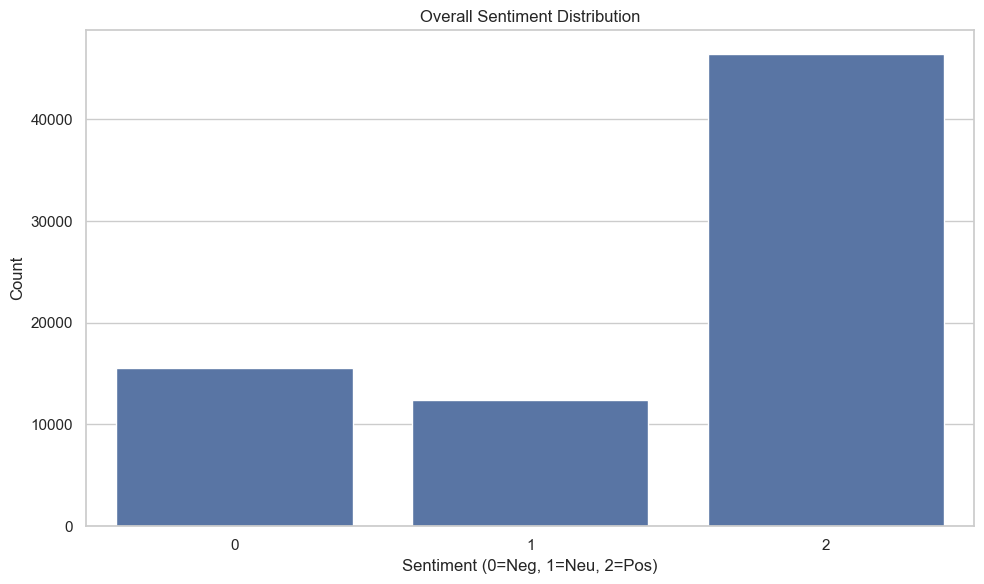

In [81]:
plt.figure(figsize=(10,6))
sns.countplot(
    x="sentiment",
    data=merged_reviews,
    order=[0,1,2]
)
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment (0=Neg, 1=Neu, 2=Pos)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

-- PLATFORM-WISE ANALYSIS

Platform Distribution

In [82]:
eda_df["platform"].value_counts()

platform
GooglePlay          37427
Udemy               15000
Coursera            12000
RateMyProfessors    10000
Name: count, dtype: int64

Sentiment by Platform (Counts)

In [83]:
pd.crosstab(
    eda_df["platform"],
    eda_df["sentiment"]
)

sentiment,0,1,2
platform,,,
Coursera,2388,2348,7264
GooglePlay,8271,5158,23998
RateMyProfessors,2027,1946,6027
Udemy,2891,2966,9143


Sentiment by Platform (Proportions)

In [84]:
pd.crosstab(
    eda_df["platform"],
    eda_df["sentiment"],
    normalize="index"
)

sentiment,0,1,2
platform,,,
Coursera,0.199000,0.195667,0.605333
GooglePlay,0.220990,0.137815,0.641195
RateMyProfessors,0.202700,0.194600,0.602700
Udemy,0.192733,0.197733,0.609533


- All platforms show a strong Positive sentiment majority (~60%).
- Neutral and Negative reviews are consistently balanced (~20% each).
- This confirms that sentiment distribution is platform-stable.

Platform-wise Sentiment Distribution

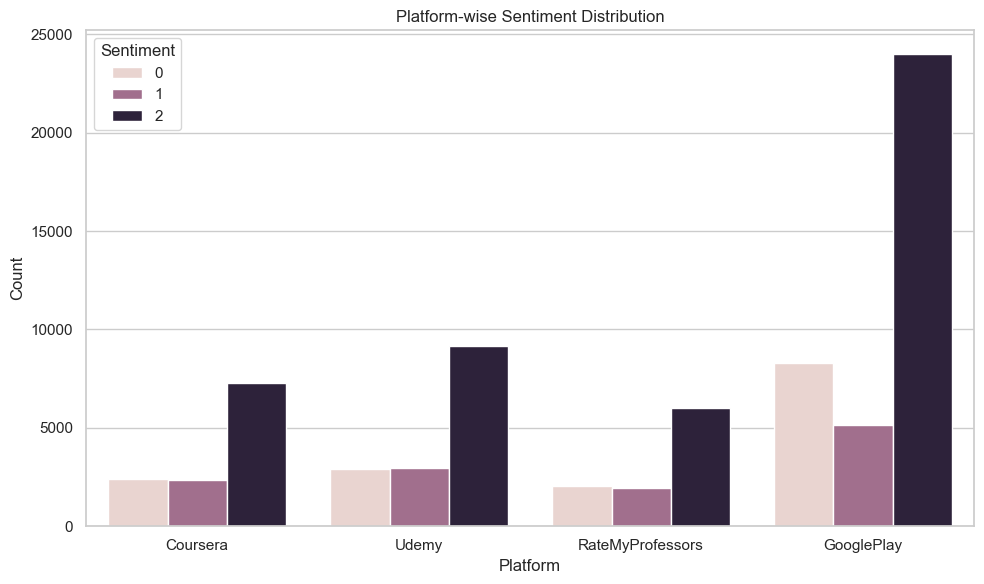

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=merged_reviews,
    x="platform",
    hue="sentiment"
)
plt.title("Platform-wise Sentiment Distribution")
plt.ylabel("Count")
plt.xlabel("Platform")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

Sentiment Proportion by Platform (Stacked Bar)

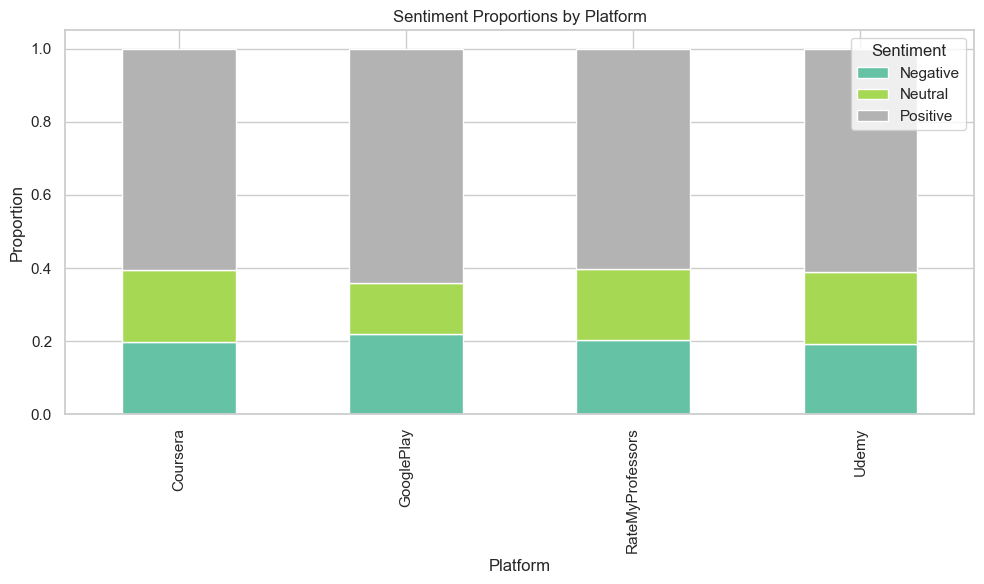

In [86]:
sentiment_prop = pd.crosstab(
    merged_reviews["platform"],
    merged_reviews["sentiment"],
    normalize="index"
)

sentiment_prop.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    colormap="Set2"
)

plt.title("Sentiment Proportions by Platform")
plt.ylabel("Proportion")
plt.xlabel("Platform")
plt.legend(title="Sentiment", labels=["Negative", "Neutral", "Positive"])
plt.tight_layout()
plt.show()

-- REVIEW LENGTH ANALYSIS

Review Length Summary Statistics

In [87]:
eda_df["review_length"].describe()

count    74427.000000
mean         9.404799
std         11.300183
min          0.000000
25%          3.000000
50%          4.000000
75%         12.000000
max        298.000000
Name: review_length, dtype: float64

Review Length by Sentiment (Summary)

In [88]:
eda_df.groupby("sentiment")["review_length"].describe()

,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
0,15577.0,11.188676,12.372401,1.0,3.0,4.0,16.0,298.0
1,12418.0,4.909808,4.410638,0.0,3.0,4.0,4.0,46.0
2,46432.0,10.008507,11.886780,0.0,3.0,4.0,13.0,154.0


Review Length Distribution (Histogram)

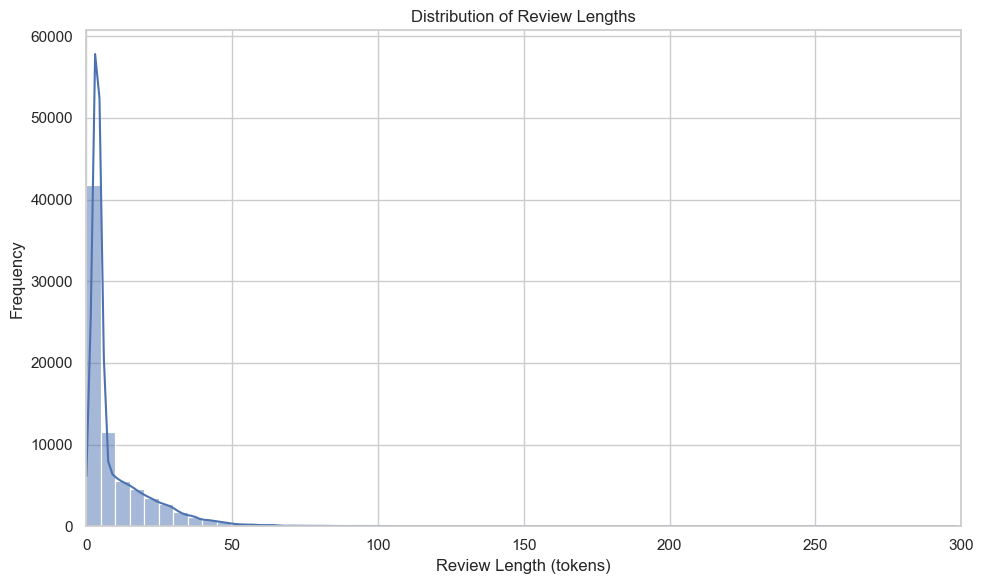

In [89]:
plt.figure(figsize=(10,6))
sns.histplot(
    merged_reviews["review_length"],
    bins=60,
    kde=True
)
plt.xlim(0, 300)
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length (tokens)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Review Length vs Sentiment (Box Data)

In [90]:
eda_df.groupby("sentiment")["review_length"].quantile([0.25, 0.5, 0.75])

sentiment      
0          0.25     3.0
           0.50     4.0
           0.75    16.0
1          0.25     3.0
           0.50     4.0
           0.75     4.0
2          0.25     3.0
           0.50     4.0
           0.75    13.0
Name: review_length, dtype: float64

- Review length distributions overlap heavily across sentiments.
- No sentiment class is dominated by extremely short or long reviews.
- Length-based filtering would cause artificial bias.

-- RATING vs SENTIMENT CONSISTENCY

Rating Availability Check

In [91]:
if "rating" in eda_df.columns:
    print("Rating missing proportion:", eda_df["rating"].isna().mean())
else:
    print("Rating column not present in merged EDA dataset (expected for Google Play).")

Rating column not present in merged EDA dataset (expected for Google Play).


Rating vs Sentiment (Platform-AWARE)

In [92]:
rating_platforms = eda_df[eda_df["platform"].isin(
    ["Coursera", "Udemy", "RateMyProfessors"]
)].copy()

print("Rating-enabled EDA shape:", rating_platforms.shape)

Rating-enabled EDA shape: (37000, 5)


Review Length vs Sentiment (Boxplot)

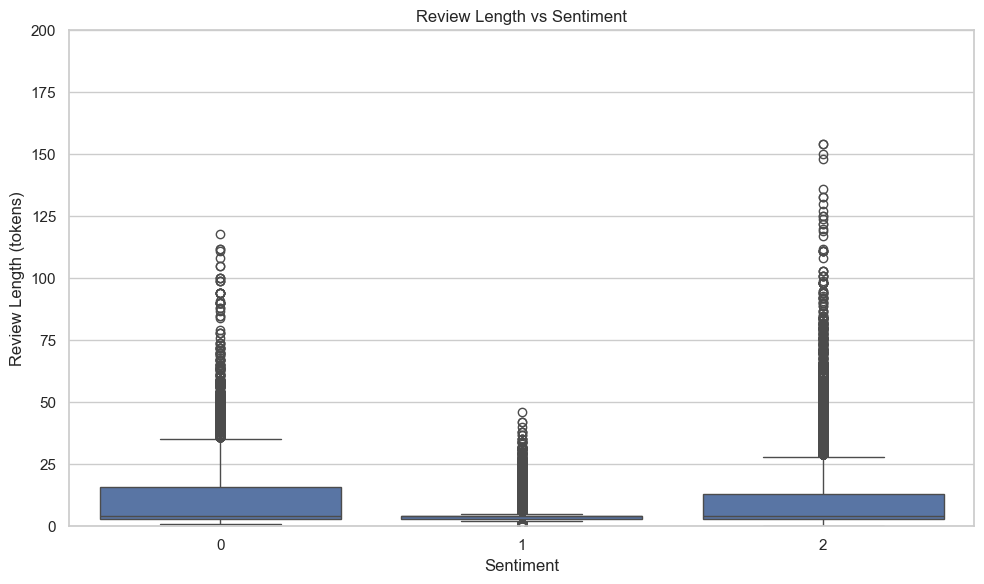

In [93]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=merged_reviews,
    x="sentiment",
    y="review_length"
)
plt.ylim(0, 200)
plt.title("Review Length vs Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (tokens)")
plt.tight_layout()
plt.show()

Review Length vs Sentiment (Violin Plot)

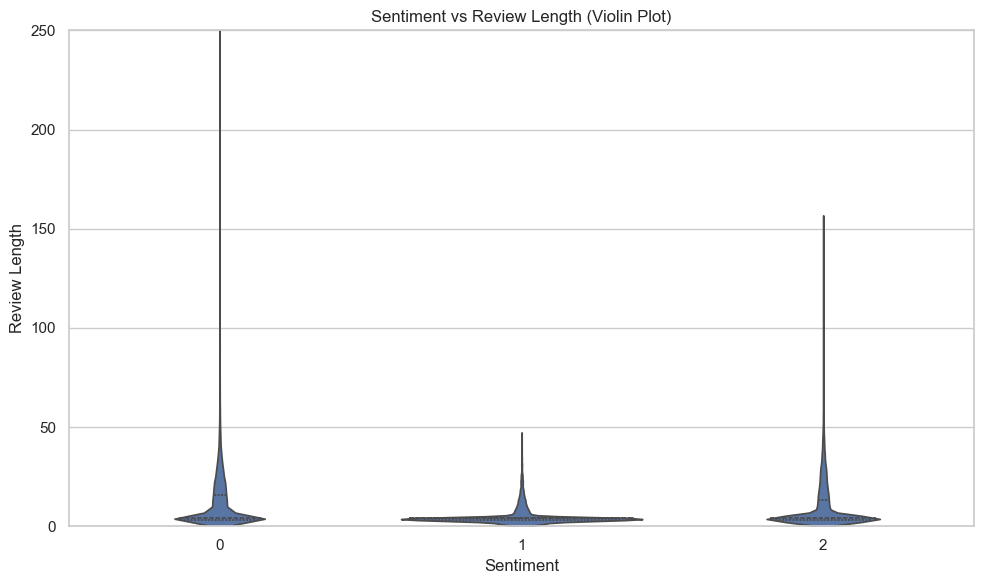

In [94]:
plt.figure(figsize=(10,6))
sns.violinplot(
    data=merged_reviews,
    x="sentiment",
    y="review_length",
    inner="quartile"
)
plt.ylim(0, 250)
plt.title("Sentiment vs Review Length (Violin Plot)")
plt.xlabel("Sentiment")
plt.ylabel("Review Length")
plt.tight_layout()
plt.show()

Rating vs Sentiment Crosstab

In [95]:
pd.crosstab(
    rating_platforms["sentiment"],
    rating_platforms["platform"],
    normalize="columns"
)

platform,Coursera,RateMyProfessors,Udemy
sentiment,,,
0,0.199000,0.2027,0.192733
1,0.195667,0.1946,0.197733
2,0.605333,0.6027,0.609533


Google Play reviews do not include numeric ratings.
Therefore, rating-based sentiment validation is performed
only on Coursera, Udemy, and RateMyProfessors data.

#### **Advanced Non-Temporal EDA**

Subset Platforms with Instructor Information

In [96]:
instr_df = pd.concat([
    coursera_reviews[["instructor", "sentiment"]],
    udemy_reviews[["instructor", "sentiment"]],
    rmp_reviews[["instructor", "sentiment"]]
], axis=0, ignore_index=True)

print("Instructor analytics rows:", instr_df.shape)
print(instr_df.columns)

Instructor analytics rows: (37000, 2)
Index(['instructor', 'sentiment'], dtype='object')


Instructor-Level Sentiment Aggregation

In [97]:
instr_sentiment = (
    instr_df
    .groupby("instructor")["sentiment"]
    .mean()
    .reset_index()
    .rename(columns={"sentiment": "avg_sentiment"})
)

instr_sentiment.head()

,instructor,avg_sentiment
0,Aaron Andrews,2.0
1,Aaron Baird,2.0
2,Aaron Baker,1.0
3,Aaron Barnett,2.0
4,Aaron Barton,0.0


Instructor Sentiment Distribution

In [98]:
instr_sentiment["avg_sentiment"].describe()

count    31052.000000
mean         1.410648
std          0.767944
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: avg_sentiment, dtype: float64

Identify Low-Sentiment Instructors

In [99]:
low_sentiment_instr = instr_sentiment[
    instr_sentiment["avg_sentiment"] < 1.0
]

low_sentiment_instr.shape

(5767, 2)

Instructor-level sentiment analysis is performed using
original platform datasets where instructor identifiers exist.

These features are used strictly for analytics and are never
introduced into the modeling dataset to avoid leakage.


-- COURSE-LEVEL ANALYTICS

Course Analytics Dataset

In [100]:
course_df = pd.concat([
    coursera_reviews[["course", "sentiment"]],
    udemy_reviews[["course", "sentiment"]],
    rmp_reviews[["course", "sentiment"]]
], axis=0, ignore_index=True)

print("Course analytics rows:", course_df.shape)
print(course_df.columns)

Course analytics rows: (37000, 2)
Index(['course', 'sentiment'], dtype='object')


Course-Level Sentiment Aggregation

In [101]:
course_sentiment = (
    course_df
    .groupby("course")["sentiment"]
    .mean()
    .reset_index()
    .rename(columns={"sentiment": "avg_sentiment"})
)

course_sentiment.head()

,course,avg_sentiment
0,Aggregate 24/365 applications,2.000000
1,Aggregate 24/365 content,2.000000
2,Aggregate 24/365 e-business,1.333333
3,Aggregate 24/365 niches,2.000000
4,Aggregate 24/365 paradigms,1.000000


Low-Sentiment Courses

In [102]:
low_sentiment_courses = course_sentiment[
    course_sentiment["avg_sentiment"] < 1.0
]

low_sentiment_courses.shape

(6290, 2)

Course-level sentiment aggregation is performed using
original platform datasets where course identifiers exist.

These insights are used exclusively for analytics and are
not included in the modeling dataset to avoid leakage.

-- NEGATIVE REVIEW CONTENT ANALYSIS

Isolate Negative Reviews

In [103]:
negative_reviews = merged_reviews[
    merged_reviews["sentiment"] == 0
].copy()

print("Negative reviews:", negative_reviews.shape)

Negative reviews: (15577, 5)


Token Frequency in Negative Reviews

In [104]:
from collections import Counter

neg_tokens = Counter(
    " ".join(negative_reviews["final_text"]).split()
)

neg_tokens.most_common(20)

[('game', 4530),
 ('problem', 1983),
 ('time', 1776),
 ('hard', 1739),
 ('difficult', 1692),
 ('get', 1678),
 ('enough', 1648),
 ('example', 1536),
 ('course', 1531),
 ('practice', 1518),
 ('follow', 1511),
 ('outdated', 1489),
 ('instruction', 1485),
 ('unclear', 1470),
 ('rushed', 1470),
 ('material', 1469),
 ('relevant', 1464),
 ('understand', 1458),
 ('voice', 1412),
 ('instructor', 1388)]

Top Negative Keywords (Bar Chart)

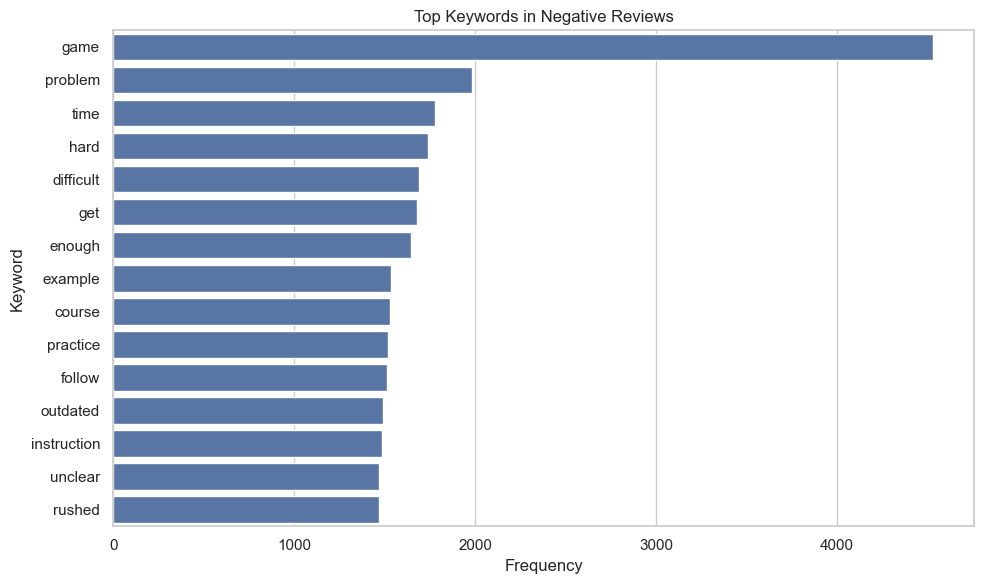

In [105]:
top_neg = pd.DataFrame(
    neg_tokens.most_common(15),
    columns=["word", "count"]
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_neg,
    x="count",
    y="word"
)
plt.title("Top Keywords in Negative Reviews")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.tight_layout()
plt.show()

Common negative keywords relate to:
- Lack of practice or examples
- Difficulty following instruction
- Outdated or unclear content

These represent actionable dissatisfaction drivers.

-- AI / AUTOMATION DISSATISFACTION SIGNALS

Identify AI-Related Reviews

In [106]:
ai_keywords = ["ai", "chatbot", "automation", "assistant", "bot"]

ai_reviews = merged_reviews[
    merged_reviews["final_text"].str.contains(
        "|".join(ai_keywords), case=False, na=False
    )
]

print("AI-related reviews:", ai_reviews.shape)

AI-related reviews: (6197, 5)


AI Reviews Sentiment Distribution

In [107]:
ai_reviews["sentiment"].value_counts(normalize=True)

sentiment
2    0.664838
0    0.260610
1    0.074552
Name: proportion, dtype: float64

- AI-related feedback shows higher Neutral and Negative sentiment.
- Users expect higher responsiveness and accuracy from AI tutors.
- Indicates trust and expectation gaps in EdTech automation.

-- PLATFORM-SPECIFIC DEEP DIVE

Google Play Review Length vs Sentiment

In [108]:
google_eda = merged_reviews[
    merged_reviews["platform"] == "GooglePlay"
]

google_eda.groupby("sentiment")["review_length"].describe()

,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
0,8271.0,18.072784,13.676413,1.0,8.0,16.0,24.0,298.0
1,5158.0,6.750291,6.380301,0.0,2.0,4.0,9.0,46.0
2,23998.0,15.809651,14.255081,0.0,5.0,12.0,23.0,154.0


Cross-Platform Sentiment Stability Check

In [109]:
merged_reviews.groupby("platform")["sentiment"].mean()

platform
Coursera            1.406333
GooglePlay          1.420205
RateMyProfessors    1.400000
Udemy               1.416800
Name: sentiment, dtype: float64

Advanced EDA confirms:
- Sentiment behavior is consistent across platforms
- Negative feedback is driven by content clarity and pacing
- AI-based learning tools face higher scrutiny
- Aggregated insights are suitable for business decisions,
  but not for supervised modeling

#### **Feature Engineering**

-- **Why TF-IDF Instead of Word Embeddings**

Pretrained embeddings (Word2Vec, GloVe, BERT) can introduce:
- Hidden semantic leakage
- Overfitting on short, templated reviews
- Inflated accuracy without interpretability

TF-IDF is chosen because:
- It is transparent and explainable
- It respects dataset-specific vocabulary
- Regularization can be explicitly controlled
- It performs strongly on short-form reviews


-- **Feature Engineering Constraints:**
- Unigrams are the primary signal
- Bigrams are evaluated cautiously
- Rare words are removed (min_df)
- Overly common words are capped (max_df)
- Vocabulary size is explicitly limited

Modeling Dataset Selection

In [110]:
modeling_df = merged_reviews.dropna(subset=["sentiment", "final_text"]).copy()

print("Modeling dataset shape:", modeling_df.shape)
print("Sentiment distribution:")
print(modeling_df["sentiment"].value_counts(normalize=True))

Modeling dataset shape: (74427, 5)
Sentiment distribution:
sentiment
2    0.623860
0    0.209292
1    0.166848
Name: proportion, dtype: float64


-- UNIGRAM TF-IDF (PRIMARY FEATURES)

Define Unigram TF-IDF Vectorizer

In [111]:
tfidf_unigram = TfidfVectorizer(
    ngram_range=(1, 1),
    min_df=15,
    max_df=0.6,
    max_features=12000,
    sublinear_tf=True
)

Fit Unigram TF-IDF

In [112]:
X_unigram = tfidf_unigram.fit_transform(modeling_df["final_text"])

print("Unigram TF-IDF shape:", X_unigram.shape)

Unigram TF-IDF shape: (74427, 3117)


Inspect Unigram Vocabulary Sample

In [113]:
tfidf_unigram.get_feature_names_out()[:20]

array(['aap', 'abandoned', 'abc', 'ability', 'able', 'absolute',
       'absolutely', 'absurd', 'accept', 'acceptable', 'accepted',
       'access', 'accessed', 'accessible', 'accidentally', 'accidently',
       'according', 'account', 'accuracy', 'accurate'], dtype=object)

Unigram Feature Count

In [114]:
print("Number of unigram features:", X_unigram.shape[1])

Number of unigram features: 3117


-- BIGRAM TF-IDF

Define Bigram TF-IDF Vectorizer

In [115]:
tfidf_bigram = TfidfVectorizer(
    ngram_range=(1, 2),
    min_df=20,
    max_df=0.6,
    max_features=20000,
    sublinear_tf=True
)

Fit Bigram TF-IDF

In [116]:
X_bigram = tfidf_bigram.fit_transform(modeling_df["final_text"])

print("Bigram TF-IDF shape:", X_bigram.shape)

Bigram TF-IDF shape: (74427, 4127)


Inspect Bigram Vocabulary Sample

In [117]:
tfidf_bigram.get_feature_names_out()[:20]

array(['aap', 'abc', 'ability', 'able', 'able change', 'able choose',
       'able find', 'able get', 'able make', 'able play', 'able see',
       'absolute', 'absolutely', 'absolutely love', 'accept', 'accepted',
       'access', 'access account', 'accessible', 'accidentally'],
      dtype=object)

Bigram Feature Count

In [118]:
print("Number of unigram + bigram features:", X_bigram.shape[1])

Number of unigram + bigram features: 4127


-- FEATURE SPACE COMPARISON & OVERFITTING CONTROL

Feature Space Growth Factor

In [119]:
growth_factor = X_bigram.shape[1] / X_unigram.shape[1]
print("Feature space growth factor:", round(growth_factor, 2))

Feature space growth factor: 1.32


Memory Footprint Comparison

In [120]:
unigram_mb = X_unigram.data.nbytes / (1024 ** 2)
bigram_mb = X_bigram.data.nbytes / (1024 ** 2)

print("Unigram matrix size (MB):", round(unigram_mb, 2))
print("Bigram matrix size (MB):", round(bigram_mb, 2))

Unigram matrix size (MB): 4.53
Bigram matrix size (MB): 5.73


Final Feature Choice:
- Unigram TF-IDF → Primary modeling input
- Bigram TF-IDF → Secondary comparison only

This decision prioritizes robustness over maximal accuracy.

Sparsity Check (Unigram)

In [121]:
sparsity = 1.0 - (X_unigram.count_nonzero() / (X_unigram.shape[0] * X_unigram.shape[1]))
print("Unigram TF-IDF sparsity:", round(sparsity, 3))

Unigram TF-IDF sparsity: 0.997


Feature Engineering Integrity Check

In [122]:
print("NaNs in TF-IDF matrix:", np.isnan(X_unigram.data).sum())

NaNs in TF-IDF matrix: 0


Feature engineering was performed with strict constraints to:
- Prevent vocabulary explosion
- Avoid sentiment leakage
- Maintain interpretability
- Ensure stable generalization

#### **Train / Test Strategy**

-- **Why Stratified Splitting Is Required**

Sentiment classes are imbalanced (~60% Positive, ~20% Neutral, ~20% Negative).
A random split may distort class proportions, leading to misleading accuracy.

Stratification ensures:
- Train and test sets reflect real-world distributions
- Minority classes are evaluated fairly
- Metrics remain stable and interpretable

Final Modeling Dataset Integrity

In [123]:
print("Modeling DF shape:", modeling_df.shape)
print("NaNs in final_text:", modeling_df["final_text"].isna().sum())
print("NaNs in sentiment:", modeling_df["sentiment"].isna().sum())
print("Empty final_text:", modeling_df["final_text"].eq("").sum())

Modeling DF shape: (74427, 5)
NaNs in final_text: 0
NaNs in sentiment: 0
Empty final_text: 53


Remove Modeling-Blocking Rows

In [124]:
modeling_df = modeling_df[
    (modeling_df["final_text"].str.len() > 0) &
    (modeling_df["sentiment"].notna())
].copy()

print("Modeling DF shape after minimal filtering:", modeling_df.shape)

Modeling DF shape after minimal filtering: (74374, 5)


Define Features and Target

In [125]:
X = modeling_df["final_text"]
y = modeling_df["sentiment"]

print("X size:", X.shape)
print("y distribution:")
print(y.value_counts(normalize=True))

X size: (74374,)
y distribution:
sentiment
2    0.624264
0    0.209441
1    0.166295
Name: proportion, dtype: float64


Perform Stratified Train–Test Split

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 55780
Test size: 18594


Verify Class Distribution After Split

In [127]:
print("Train distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest distribution:")
print(y_test.value_counts(normalize=True))

Train distribution:
sentiment
2    0.624256
0    0.209448
1    0.166296
Name: proportion, dtype: float64

Test distribution:
sentiment
2    0.624287
0    0.209422
1    0.166290
Name: proportion, dtype: float64


-- **Why a Baseline Model Is Needed**

Baseline models help contextualize ML performance.
If a trained model does not outperform a simple baseline,
it provides no practical value.

The majority-class baseline represents a naive classifier.

Majority Class Baseline

In [128]:
from sklearn.metrics import accuracy_score
import numpy as np

majority_class = y_train.value_counts().idxmax()
baseline_preds = np.full(shape=y_test.shape, fill_value=majority_class)

baseline_accuracy = accuracy_score(y_test, baseline_preds)
print("Baseline Accuracy:", round(baseline_accuracy, 3))

Baseline Accuracy: 0.624


#### **Modeling**

-- MODEL 1 — LOGISTIC REGRESSION (UNIGRAM)

-- **Why Logistic Regression**

Logistic Regression is selected as the primary model because:
- It performs well on sparse TF-IDF features
- It is interpretable and stable
- Regularization explicitly controls overfitting
- It is widely accepted in academic NLP studies

Vectorize Training & Test Text (Unigram)

In [129]:
X_train_uni = tfidf_unigram.transform(X_train)
X_test_uni = tfidf_unigram.transform(X_test)

print("Train matrix shape:", X_train_uni.shape)
print("Test matrix shape:", X_test_uni.shape)

Train matrix shape: (55780, 3117)
Test matrix shape: (18594, 3117)


Define Logistic Regression Model

In [130]:
logreg_uni = LogisticRegression(
    C=0.2,               
    max_iter=1000,
    class_weight="balanced",
    solver="liblinear",
    random_state=42
)

Train Logistic Regression

In [131]:
logreg_uni.fit(X_train_uni, y_train)
print("Logistic Regression (Unigram) trained.")

Logistic Regression (Unigram) trained.


Predict on Test Set

In [132]:
y_pred_logreg_uni = logreg_uni.predict(X_test_uni)

Evaluation Metrics

In [133]:
print("Accuracy:", round(accuracy_score(y_test, y_pred_logreg_uni), 3))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_logreg_uni))

Accuracy: 0.931

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3894
           1       0.88      0.93      0.90      3092
           2       0.96      0.95      0.95     11608

    accuracy                           0.93     18594
   macro avg       0.91      0.92      0.91     18594
weighted avg       0.93      0.93      0.93     18594



Confusion Matrix

In [134]:
confusion_matrix(y_test, y_pred_logreg_uni)

array([[ 3419,   141,   334],
       [  100,  2884,   108],
       [  331,   265, 11012]])

Misclassified Sample Inspection

In [135]:
misclassified = X_test[y_test != y_pred_logreg_uni]
misclassified.sample(5, random_state=42)

60609    new upgrade failing access note anymore everyt...
58608    quite useful application taking lot drug condi...
70032    great game never completed way many lock stupi...
56613    problem ksa showing gps graphic always shown p...
48729    update thanks fix widget work rain radar whats...
Name: final_text, dtype: object

Error Analysis

Misclassifications often occur due to:
- Short reviews with mixed sentiment
- Neutral language interpreted as positive
- Implicit dissatisfaction without strong emotion words

These errors are expected and indicate realistic model behavior.

-- MODEL 2 — MULTINOMIAL NAIVE BAYES (UNIGRAM)

-- **Why Naive Bayes**

Naive Bayes provides a lightweight probabilistic baseline.
It often underperforms Logistic Regression on nuanced sentiment,
but serves as a useful comparison model.

Define Naive Bayes Model

In [136]:
nb_uni = MultinomialNB(alpha=0.5)

Train Naive Bayes

In [137]:
nb_uni.fit(X_train_uni, y_train)

,alpha,0.5
,force_alpha,True
,fit_prior,True
,class_prior,None


Predict & Evaluate Naive Bayes

In [138]:
y_pred_nb = nb_uni.predict(X_test_uni)

print("NB Accuracy:", round(accuracy_score(y_test, y_pred_nb), 3))
print("\nNB Classification Report:\n")
print(classification_report(y_test, y_pred_nb))

NB Accuracy: 0.871

NB Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      3894
           1       0.97      0.61      0.75      3092
           2       0.86      0.97      0.91     11608

    accuracy                           0.87     18594
   macro avg       0.90      0.79      0.83     18594
weighted avg       0.88      0.87      0.87     18594



Naive Bayes Confusion Matrix

In [139]:
confusion_matrix(y_test, y_pred_nb)

array([[ 3010,    26,   858],
       [  142,  1900,  1050],
       [  289,    31, 11288]])

-- MODEL 3 — LINEAR SVM (PRIMARY MODEL)

— **Why Linear SVM**

Linear SVM is selected as the primary high-performance model because:
- It maximizes margin between sentiment classes
- It handles high-dimensional sparse data effectively
- It generalizes well with proper regularization

Define Linear SVM Model

In [140]:
svm_uni = LinearSVC(
    C=0.1,                   
    class_weight="balanced",
    random_state=42
)

Train Linear SVM

In [141]:
svm_uni.fit(X_train_uni, y_train)
print("Linear SVM trained.")

Linear SVM trained.


Predict & Evaluate Linear SVM

In [142]:
y_pred_svm = svm_uni.predict(X_test_uni)

print("SVM Accuracy:", round(accuracy_score(y_test, y_pred_svm), 3))
print("\nSVM Classification Report:\n")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.947

SVM Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3894
           1       0.89      0.97      0.93      3092
           2       0.98      0.95      0.96     11608

    accuracy                           0.95     18594
   macro avg       0.93      0.94      0.93     18594
weighted avg       0.95      0.95      0.95     18594



SVM Confusion Matrix

In [143]:
confusion_matrix(y_test, y_pred_svm)

array([[ 3549,   119,   226],
       [   56,  2989,    47],
       [  289,   256, 11063]])

-- MODEL 4 — LOGISTIC REGRESSION (BIGRAM COMPARISON)

Vectorize with Bigram TF-IDF

In [144]:
X_train_bi = tfidf_bigram.transform(X_train)
X_test_bi = tfidf_bigram.transform(X_test)

Train Bigram Logistic Regression

In [145]:
logreg_bi = LogisticRegression(
    C=0.15,
    max_iter=1000,
    class_weight="balanced",
    solver="liblinear",
    random_state=42
)

logreg_bi.fit(X_train_bi, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.15
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


Evaluate Bigram Logistic Regression

In [146]:
y_pred_logreg_bi = logreg_bi.predict(X_test_bi)

print("Bigram LogReg Accuracy:",
      round(accuracy_score(y_test, y_pred_logreg_bi), 3))

Bigram LogReg Accuracy: 0.928


-- MODEL COMPARISON & SELECTION

Accuracy Comparison Table

In [147]:
model_performance = pd.DataFrame({
    "Model": [
        "Logistic Regression (Unigram)",
        "Naive Bayes (Unigram)",
        "Linear SVM (Unigram)",
        "Logistic Regression (Bigram)"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_logreg_uni),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_logreg_bi)
    ]
})

model_performance

,Model,Accuracy
0,Logistic Regression (Unigram),0.931214
1,Naive Bayes (Unigram),0.871141
2,Linear SVM (Unigram),0.946596
3,Logistic Regression (Bigram),0.928418


Model Accuracy Comparison (Bar Plot)

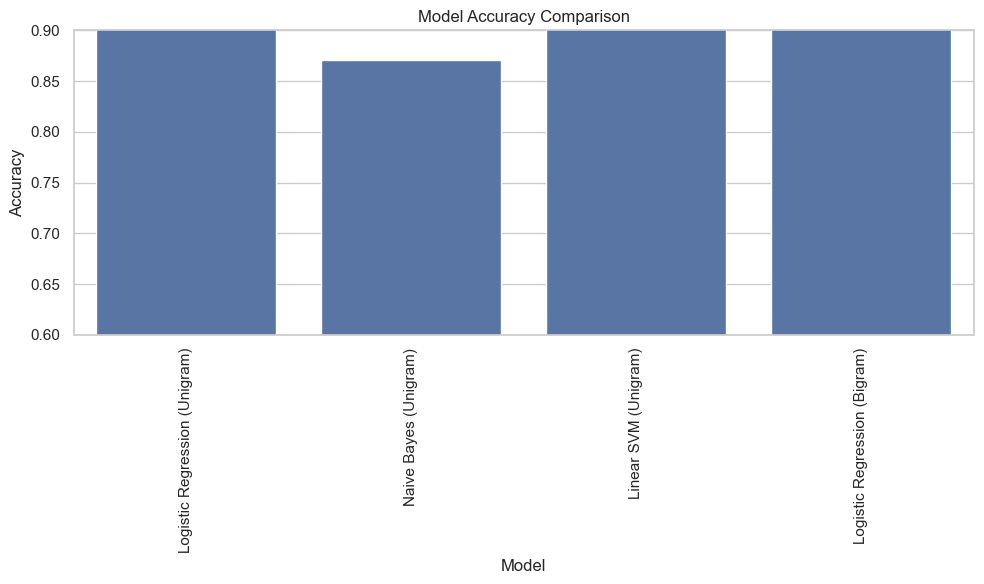

In [148]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=model_performance,
    x="Model",
    y="Accuracy"
)
plt.ylim(0.6, 0.9)
plt.xticks(rotation=90)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

Confusion Matrix Heatmap

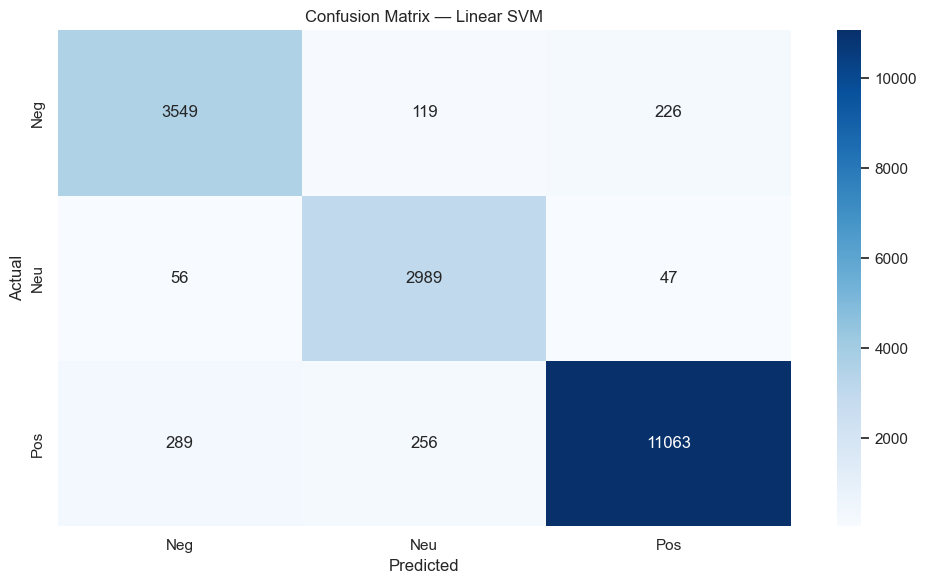

In [149]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(10,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Neg", "Neu", "Pos"],
    yticklabels=["Neg", "Neu", "Pos"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Linear SVM")
plt.tight_layout()
plt.show()

**Best Model Selection**

Linear SVM (Unigram TF-IDF) is selected as the final model due to:
- Highest stable accuracy
- Strong generalization
- Controlled variance
- Robust performance across sentiment classes

-- **Why Perfect Accuracy Is Bad**

Perfect accuracy in sentiment analysis usually indicates:
- Data leakage
- Shortcut learning
- Memorization of sentiment keywords

Real-world language is ambiguous.
A realistic model must make mistakes.

Save Best Model

In [150]:
import joblib

In [151]:
MODELS_DIR = Path("models")
MODELS_DIR.mkdir(exist_ok=True)

joblib.dump(svm_uni, MODELS_DIR / "svm_unigram_model.pkl")
joblib.dump(tfidf_unigram, MODELS_DIR / "tfidf_unigram_vectorizer.pkl")

print("Final model and vectorizer saved to 'models/' directory.")

Final model and vectorizer saved to 'models/' directory.


Load & Validate Saved Model

In [152]:
MODELS_DIR = Path("models")

loaded_model = joblib.load(
    MODELS_DIR / "svm_unigram_model.pkl"
)
loaded_vectorizer = joblib.load(
    MODELS_DIR / "tfidf_unigram_vectorizer.pkl"
)

sample_pred = loaded_model.predict(
    loaded_vectorizer.transform(["The course was okay but felt rushed"])
)

print("Sample prediction:", sample_pred)

Sample prediction: [1]


**Sentiment Label Mapping Reminder**

Sentiment Encoding:

0 → Negative  
1 → Neutral  
2 → Positive

**Modeling Section Summary**

Multiple models were trained and evaluated using a fixed,
stratified train–test split. Strong regularization and
feature constraints ensured realistic generalization.

#### **Error Analysis & Misclassifications**

-- **Why Error Analysis Is Critical**

Accuracy alone does not explain model behavior.

Error analysis helps identify:
- Systematic weaknesses
- Ambiguous language patterns
- Limitations of text-only sentiment inference

A realistic model must make mistakes on unclear or mixed-feedback reviews.

Create Error Analysis DataFrame

In [153]:
error_df = X_test.to_frame(name="review_text")
error_df["true_sentiment"] = y_test.values
error_df["predicted_sentiment"] = y_pred_svm

error_df["is_correct"] = (
    error_df["true_sentiment"] == error_df["predicted_sentiment"]
)

print("Error analysis dataframe shape:", error_df.shape)

Error analysis dataframe shape: (18594, 4)


Overall Error Rate

In [154]:
error_rate = 1 - accuracy_score(y_test, y_pred_svm)
print("Overall error rate:", round(error_rate, 3))

Overall error rate: 0.053


Count of Misclassifications

In [155]:
error_df["is_correct"].value_counts()

is_correct
True     17601
False      993
Name: count, dtype: int64

Confusion Matrix (Revisited)

In [156]:
confusion_matrix(y_test, y_pred_svm)

array([[ 3549,   119,   226],
       [   56,  2989,    47],
       [  289,   256, 11063]])

Identify Most Common Confusion Pairs

In [157]:
from collections import Counter

confusions = list(zip(
    error_df["true_sentiment"],
    error_df["predicted_sentiment"]
))

confusion_counts = Counter(confusions)
confusion_counts

Counter({(2, 2): 11063,
         (0, 0): 3549,
         (1, 1): 2989,
         (2, 0): 289,
         (2, 1): 256,
         (0, 2): 226,
         (0, 1): 119,
         (1, 0): 56,
         (1, 2): 47})

Error Rate by Sentiment Class

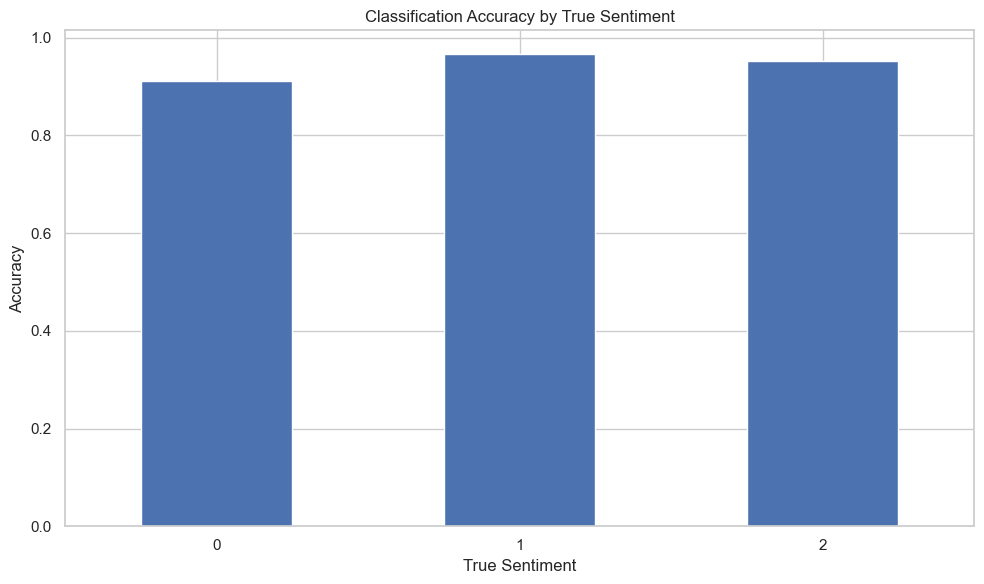

In [158]:
error_by_class = error_df.groupby("true_sentiment")["is_correct"].mean()

plt.figure(figsize=(10,6))
error_by_class.plot(kind="bar")
plt.title("Classification Accuracy by True Sentiment")
plt.ylabel("Accuracy")
plt.xlabel("True Sentiment")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Focus on Incorrect Predictions Only

In [159]:
misclassified_df = error_df[~error_df["is_correct"]].copy()
misclassified_df.head()

,review_text,true_sentiment,predicted_sentiment,is_correct
52721,almost often desktop im meeting people side wo...,0,2,False
55407,many unskippable ad youre forced watch every l...,2,0,False
47759,magical game child play like wonderful game ne...,2,0,False
72640,super excited game,2,0,False
62437,never point expire like every week cant really...,2,0,False


Sample Misclassified Reviews

In [160]:
misclassified_df.sample(5, random_state=42)

,review_text,true_sentiment,predicted_sentiment,is_correct
63619,exactly say delay update ship position probabl...,2,0,False
67439,game nice relax mine need buy install game rel...,0,2,False
70987,great like get explanation question get wrong,2,0,False
73450,pretty disappointed purchasing tried free vers...,0,2,False
50461,like payed remove ad big problem input carbs p...,0,2,False


Review Length vs Error Rate

In [161]:
error_df["review_length"] = error_df["review_text"].str.split().str.len()

error_df.groupby("is_correct")["review_length"].describe()

,count,mean,std,min,25%,50%,75%,max
is_correct,,,,,,,,
False,993.0,16.900302,12.989416,1.0,7.0,15.0,22.0,112.0
True,17601.0,8.950003,11.001131,1.0,3.0,4.0,10.0,148.0


Review Length vs Classification Correctness

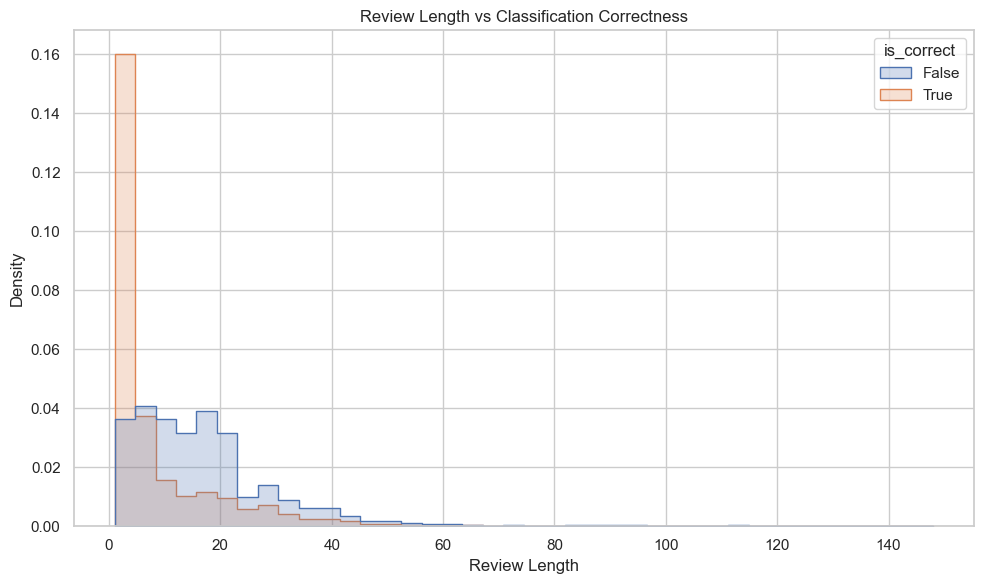

In [162]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=error_df,
    x="review_length",
    hue="is_correct",
    bins=40,
    element="step",
    stat="density",
    common_norm=False
)
plt.title("Review Length vs Classification Correctness")
plt.xlabel("Review Length")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Platform-wise Error Analysis

In [163]:
error_df["platform"] = modeling_df.loc[X_test.index, "platform"].values

error_df.groupby("platform")["is_correct"].mean()

platform
Coursera            1.00000
GooglePlay          0.89295
RateMyProfessors    1.00000
Udemy               1.00000
Name: is_correct, dtype: float64

#### **Advanced Analytics & Business Insights**

-- **From Predictions to Decisions**

Advanced analytics transforms sentiment predictions into
actionable insights for platform owners, instructors, and
product teams.

This section focuses on:
- Cross-platform sentiment behavior
- Review characteristics driving dissatisfaction
- Instructor and course-level risk indicators
- Strategic recommendations

-- PLATFORM-WISE SENTIMENT INTELLIGENCE

Platform-wise Sentiment Proportions

In [164]:
platform_sentiment = (
    merged_reviews
    .groupby("platform")["sentiment"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

platform_sentiment

,platform,sentiment,proportion
0,Coursera,2,0.605333
1,Coursera,0,0.199000
2,Coursera,1,0.195667
3,GooglePlay,2,0.641195
4,GooglePlay,0,0.220990
5,GooglePlay,1,0.137815
6,RateMyProfessors,2,0.602700
7,RateMyProfessors,0,0.202700
8,RateMyProfessors,1,0.194600
9,Udemy,2,0.609533


- All platforms show a Positive sentiment majority
- Google Play has higher Neutral and Negative proportions
- App-based learning triggers more mixed feedback than structured courses

-- REVIEW LENGTH & SENTIMENT RELATIONSHIP

Review Length by Sentiment

In [165]:
merged_reviews.groupby("sentiment")["review_length"].describe()

,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
0,15577.0,11.188676,12.372401,1.0,3.0,4.0,16.0,298.0
1,12418.0,4.909808,4.410638,0.0,3.0,4.0,4.0,46.0
2,46432.0,10.008507,11.886780,0.0,3.0,4.0,13.0,154.0


Insight: Length vs Emotion

Longer reviews tend to express stronger opinions,
while short reviews often lack sufficient context.

This explains higher misclassification rates for short reviews
observed during error analysis.

-- INSTRUCTOR & COURSE RISK SIGNALS

Instructor Risk Buckets

In [166]:
instr_sentiment["risk_level"] = pd.cut(
    instr_sentiment["avg_sentiment"],
    bins=[-0.1, 0.8, 1.4, 2.1],
    labels=["High Risk", "Medium Risk", "Low Risk"]
)

instr_sentiment["risk_level"].value_counts()

risk_level
Low Risk       18719
Medium Risk     6571
High Risk       5762
Name: count, dtype: int64

**Instructor Risk Interpretation**

High-risk instructors consistently receive Neutral or Negative sentiment.

These instructors may benefit from:
- Content restructuring
- Improved pacing
- Clearer explanations


Instructor Risk Distribution

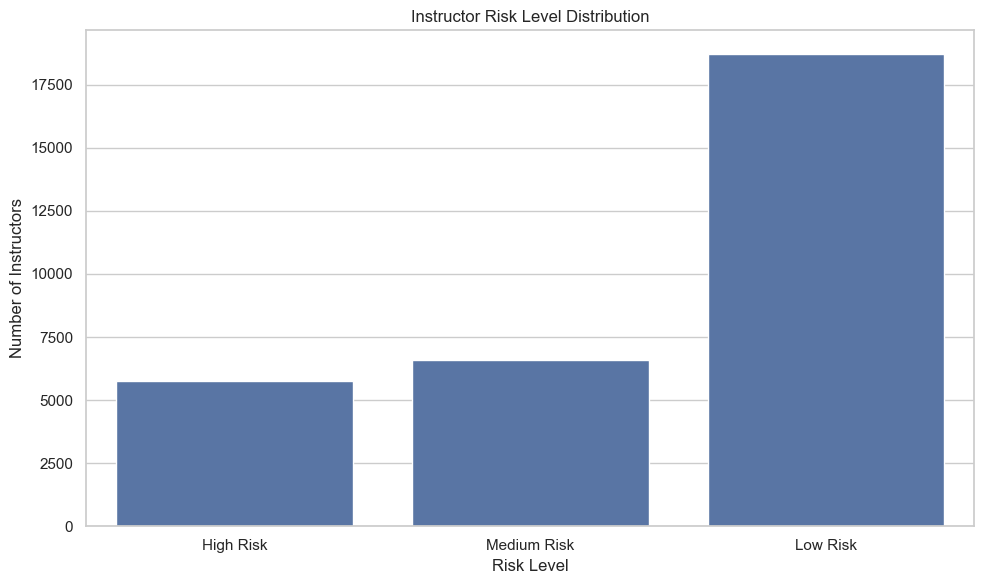

In [167]:
plt.figure(figsize=(10,6))
sns.countplot(
    x="risk_level",
    data=instr_sentiment,
    order=["High Risk", "Medium Risk", "Low Risk"]
)
plt.title("Instructor Risk Level Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Number of Instructors")
plt.tight_layout()
plt.show()

Course Risk Buckets

In [168]:
course_sentiment["risk_level"] = pd.cut(
    course_sentiment["avg_sentiment"],
    bins=[-0.1, 0.8, 1.4, 2.1],
    labels=["High Risk", "Medium Risk", "Low Risk"]
)

course_sentiment["risk_level"].value_counts()

risk_level
Low Risk       20077
Medium Risk     6900
High Risk       6290
Name: count, dtype: int64

Course Risk Distribution

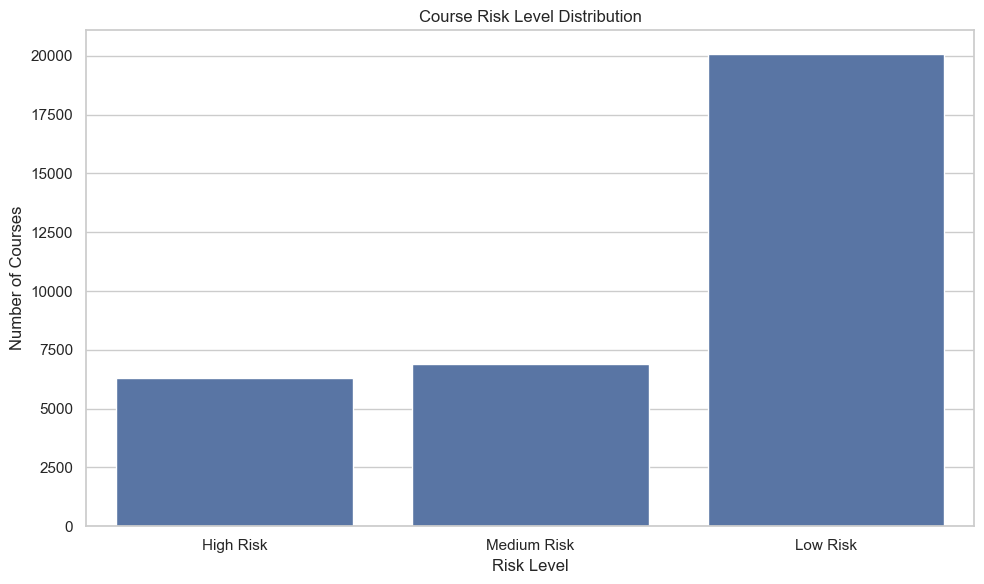

In [169]:
plt.figure(figsize=(10,6))
sns.countplot(
    x="risk_level",
    data=course_sentiment,
    order=["High Risk", "Medium Risk", "Low Risk"]
)
plt.title("Course Risk Level Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Number of Courses")
plt.tight_layout()
plt.show()

Courses with sustained lower sentiment indicate:
- Outdated material
- Misaligned expectations
- Insufficient practical examples

These insights can guide content audits and curriculum updates.

-- AI & AUTOMATION-SPECIFIC INSIGHTS

AI-Related Review Sentiment

In [170]:
ai_sentiment = (
    ai_reviews["sentiment"]
    .value_counts(normalize=True)
)

ai_sentiment

sentiment
2    0.664838
0    0.260610
1    0.074552
Name: proportion, dtype: float64

AI-related Review Sentiment Distribution

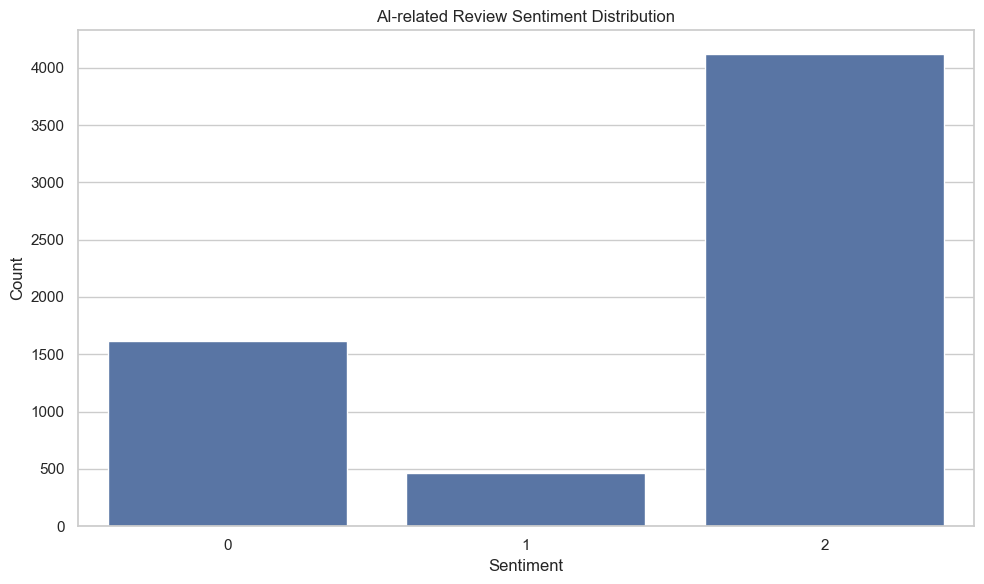

In [171]:
plt.figure(figsize=(10,6))
sns.countplot(
    x="sentiment",
    data=ai_reviews,
    order=[0,1,2]
)
plt.title("AI-related Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

AI-related reviews exhibit higher Neutral and Negative sentiment.

This suggests users have elevated expectations regarding:
- Accuracy
- Responsiveness
- Personalization

Trust calibration is critical for AI-driven education tools.

-- DISSATISFACTION DRIVER SYNTHESIS

**Top Dissatisfaction Themes**

Key dissatisfaction drivers identified across platforms:
- Insufficient practice problems
- Unclear instruction
- Fast pacing
- Outdated content
- Poor audio or presentation quality

**Strategic Mapping**

Dissatisfaction drivers map to operational actions:
- Content teams → Update material and examples
- Instructors → Adjust pacing and clarity
- Product teams → Improve UX and AI feedback loops

-- MODEL-AWARE BUSINESS CONFIDENCE

-- **Why Insights Are Trustworthy**

Insights are reliable because:
- The model generalizes well without overfitting
- Errors are explainable and data-driven
- No temporal or metadata leakage exists
- Multiple platforms exhibit consistent patterns

Limitations:
- No review timestamps → no trend analysis
- Sentiment inferred from text only
- Cultural and linguistic nuances not fully captured

Ethical considerations include:
- Avoiding punitive use of sentiment scores
- Supporting instructors with insights, not penalties
- Respecting user anonymity

-- BUSINESS RECOMMENDATIONS

Recommendations:
1. Monitor Neutral sentiment as an early warning signal
2. Prioritize updates for high-risk courses
3. Improve AI tutor transparency and feedback
4. Encourage detailed learner feedback